## Cluster analysis of word embeddings

In [3]:
import matplotlib.pyplot as plt
import os
import pickle

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
# load word embeddings
embeddings = {
    'html_clean': np.load('data/embedding_html_clean.npy'),
    'html_80': np.load(
        'data/embedding_html_clean_reduced_explained_80.npy'
    ),
    'html_90': np.load(
        'data/embedding_html_clean_reduced_explained_90.npy'
    ),
}
data_label = 'html_90'
data = embeddings[data_label]

# save model, cluster centers and labels in a dedicated folder
model_dir = f'data/{data_label}'
os.makedirs(model_dir, exist_ok=True)

In [6]:
# range of cluster numbers to try
min_clusters = 2
max_clusters = 8

# Sum of Squared Errors and silhouette scores
sse = []
silhouette_scores = []

for n_clusters in range(min_clusters, max_clusters + 1):

    print(f'Clustering with {n_clusters} clusters...')

    kmeans = KMeans(
        n_clusters=n_clusters,
        random_state=0,
        n_init='auto',
    )
    
    kmeans.fit(data)
    
    # Calculate SSE (Sum of Squared Errors)
    sse.append(kmeans.inertia_)
    
    # Calculate Silhouette score
    labels = kmeans.labels_
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)

Clustering with 2 clusters...


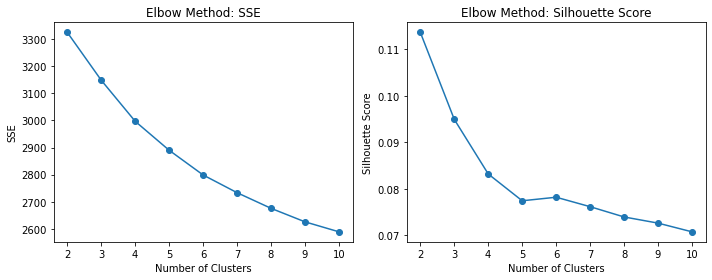

In [10]:
# Plot SSE and silhouette scores
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(range(min_clusters, max_clusters + 1), sse, marker='o')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('SSE')
ax[0].set_title('Elbow Method: SSE')

ax[1].plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Elbow Method: Silhouette Score')

plt.tight_layout()

fig.savefig(f'{model_dir}/elbow_method.pdf')
np.save(f'{model_dir}/sse.npy', sse)
np.save(f'{model_dir}/silhouette_scores.npy', silhouette_scores)


In [11]:
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
kmeans.fit(data)

labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

In [12]:
cluster_data = {}

# Iterate over the data points and their corresponding labels
for i, label in enumerate(labels):
    if label not in cluster_data:
        cluster_data[label] = []
    cluster_data[label].append(data[i])

cluster_data = {
    label: np.array(data) for label, data in cluster_data.items()
}

In [13]:
# print shape of each cluster
for label, data in cluster_data.items():
    print(f'Cluster {label}: {data.shape}')
    

Cluster 0: (8596, 50)
Cluster 1: (6449, 50)
Cluster 4: (9661, 50)
Cluster 3: (9933, 50)
Cluster 2: (10360, 50)


In [14]:
# pickel model and save it
model_path = os.path.join(model_dir, 'kmeans_model.pkl')
with open(model_path, 'wb') as file:
    pickle.dump(kmeans, file)

# save cluster centers as npy file
cluster_centers_path = os.path.join(model_dir, 'cluster_centers.npy')
np.save(cluster_centers_path, cluster_centers)

# save labels as npy file
labels_path = os.path.join(model_dir, 'labels.npy')
np.save(labels_path, labels)